In [ ]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Additionally added libraries

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
#### Remember to unpack data from .zip folders

Investigating loaded data

In [3]:
tX[tX==-999] = np.nan

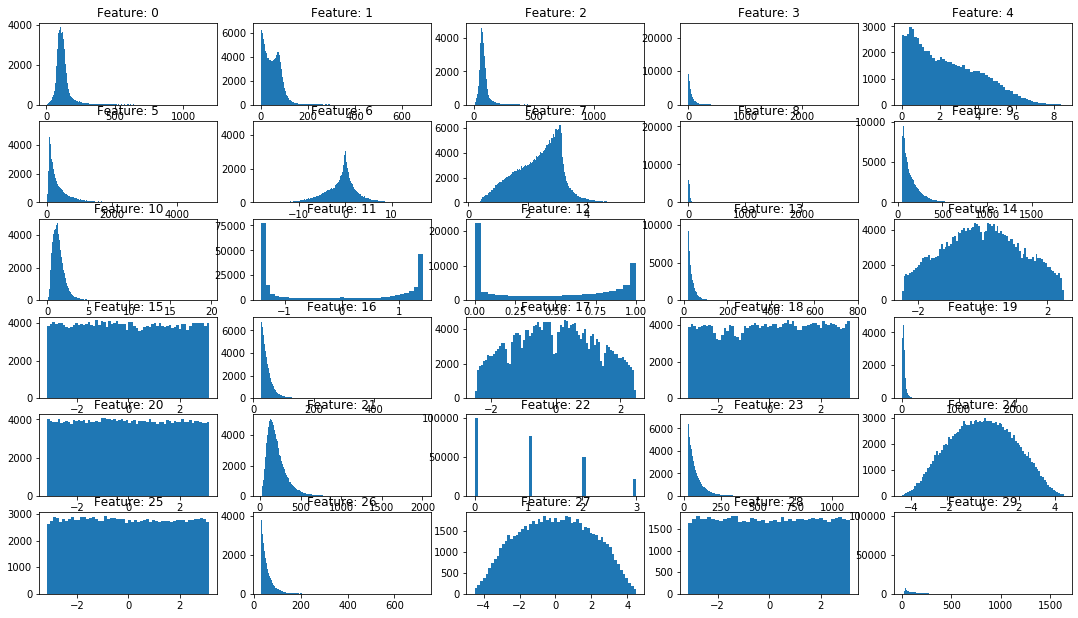

In [4]:
# Histogram tX
nrows = 6
ncols = 5
fig, axes = plt.subplots(nrows, ncols)

feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp  = tX[:,feature_id]
        axes[row, col].hist(feature_tbp[~np.isnan(feature_tbp)], bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_id))
        feature_id += 1
    
    
fig.set_size_inches(18.5, 10.5)

List of skewed features: 0, 2, 3, 4, 5, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29

In [ ]:
## Histogram last feature to show how problematic 0's are in this feature. 
plt.hist(tX[:,0], bins='auto')

In [5]:
# Numerical exploratory data analysis
# row1: mean | row2: variance | row3: standard deviation 
# row4: minimum value | row5: maximum value | row6: number of NaN's
from data_wrangling import compute_statistics

feature_statistics = compute_statistics(tX)

# store median, mean and std
train_mean = feature_statistics[0, :]
train_std = feature_statistics[2, :]
train_median = feature_statistics[6, :]

import pandas as pd
pretty_view = pd.DataFrame(feature_statistics)
pretty_view

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,121.858528,49.239819,81.181982,57.895962,2.403735,371.783360,-0.821688,2.373100,18.917332,158.432217,...,-0.010119,209.797178,0.979176,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,73.064591
1,3283.063262,1249.255942,1666.975303,4052.029594,3.035311,158162.573194,12.847474,0.612947,496.106539,13387.851528,...,3.284138,16002.060938,0.955358,3679.887218,3.184583,3.288345,1023.076126,4.127921,3.301261,9607.031571
2,57.298021,35.344815,40.828609,63.655554,1.742214,397.696584,3.584337,0.782910,22.273449,115.705884,...,1.812219,126.499253,0.977424,60.662074,1.784540,1.813379,31.985561,2.031729,1.816937,98.015466
3,9.044000,0.000000,6.329000,0.000000,0.000000,13.602000,-18.066000,0.208000,0.000000,46.104000,...,-3.142000,13.678000,0.000000,30.000000,-4.499000,-3.142000,30.000000,-4.500000,-3.142000,0.000000
4,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000
5,38114.000000,0.000000,0.000000,0.000000,177457.000000,177457.000000,177457.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,99913.000000,99913.000000,99913.000000,177457.000000,177457.000000,177457.000000,0.000000
6,112.406000,46.524000,73.752000,38.467500,2.107000,225.885000,-0.244000,2.491500,12.315500,120.664500,...,-0.024000,179.739000,1.000000,65.561000,0.000000,-0.033000,47.902000,-0.010000,-0.002000,40.512500


In [7]:
# List of skewed features to be log transformed
#skewed_features = [0, 2, 3, 4, 5, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]

#Replace NaN's with median values
from data_wrangling import shift_zeros, log_transform, standardize_features, clean_nan

## have to shift 0 with 0.0005 in order to avoid log(0)
zero_shift = 0.0005 # Done to avoid computing log(0)
categorical_index = 22 # index to avoid standardization because its categorical

tX_nan_replaced = clean_nan(tX, train_median, categorical_index)
#tX_noZero = shift_zeros(tX_nan_replaced, skewed_features, zero_shift)
#tX_logged = log_transform(tX_noZero, skewed_features)
tx_ = standardize_features(tX_nan_replaced, categorical_index, train_mean, train_std)
#tx_= tX_nan_replaced

In [ ]:
nrows = 6
ncols = 5
fig, axes = plt.subplots(nrows, ncols)

feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp  = tx_[:,feature_id]
        axes[row, col].hist(feature_tbp[~np.isnan(feature_tbp)], bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_id))
        feature_id += 1
    
    
fig.set_size_inches(18.5, 10.5)

We have to standardize dataset - a wide variety of ranges can be observed in the dataset. Would lead to a biased learning algorithm

In [17]:
##### NEW SINCE MONDAY MORNING #############
#from build_polynomial import feature_expansion
#degree = 2
#
#tx_ = feature_expansion(tx_, degree, categorical_index)
#
#view_data_nicely = pd.DataFrame(tx_)
#view_data_nicely
#############################################

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.0,0.289914,0.068332,0.407680,-0.469966,-0.857377,-0.621258,0.973036,0.882478,1.033099,...,0.021688,0.149650,0.082152,1.455949,0.063343,0.131921,3.796382e-01,1.853169e+00,0.170165,2.0
1,1.0,0.682021,0.552505,0.540136,-0.153167,-0.170321,-0.366858,0.161170,1.404888,-0.756027,...,1.106038,0.127963,0.404811,0.166547,0.416568,0.093443,8.248704e-07,5.285325e-08,0.074977,1.0
2,1.0,-0.164971,3.195156,1.096560,-0.349710,-0.170321,-0.366858,0.161170,0.989770,-0.430168,...,1.441613,0.160108,0.447300,1.327730,1.235476,0.093443,8.248704e-07,5.285325e-08,0.086418,1.0
3,1.0,0.384768,0.910379,-0.005853,-0.903016,-0.170321,-0.366858,0.161170,1.196690,-0.830735,...,0.001497,0.956776,0.100816,0.000003,0.000129,0.093443,8.248704e-07,5.285325e-08,0.555680,0.0
4,1.0,0.942536,-0.914556,1.313369,-0.651804,-0.170321,-0.366858,0.161170,1.938794,-0.112795,...,0.225665,1.533821,0.100816,0.000003,0.000129,0.093443,8.248704e-07,5.285325e-08,0.555680,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1.0,-0.164971,0.643636,-1.093204,-0.830312,-0.170321,-0.366858,0.161170,-1.253146,-0.622954,...,2.506547,0.265103,0.100816,0.000003,0.000129,0.093443,8.248704e-07,5.285325e-08,0.555680,0.0
249996,1.0,-0.164971,0.252913,-0.320829,-0.557013,-0.170321,-0.366858,0.161170,0.270657,0.158111,...,0.223573,1.046213,0.100816,0.000003,0.000129,0.093443,8.248704e-07,5.285325e-08,0.555680,0.0
249997,1.0,-0.286249,0.319316,-0.130864,-0.284955,-0.170321,-0.366858,0.161170,0.021586,0.146617,...,2.525385,0.007411,0.498498,1.021107,0.007175,0.093443,8.248704e-07,5.285325e-08,0.100500,1.0
249998,1.0,-0.469607,-0.845324,-0.302973,-0.697378,-0.170321,-0.366858,0.161170,1.266941,-0.243040,...,0.205301,0.588947,0.100816,0.000003,0.000129,0.093443,8.248704e-07,5.285325e-08,0.555680,0.0


## Do your thing crazy machine learning thing here :) ...

### Linear regression using gradient descent

In [ ]:
#from least_squares_GD import *
from costs import compute_mse
from least_squares_GD import *
from parameter_tuning import gamma_tuning_SGD
from parameter_tuning import gamma_tuning_GD

# Initialization of the weights
initial_w = np.zeros(tx_.shape[1])

# Define the parameters necessary for gradient descent: need to tune gamma. 
# we use the gamma_tuning_SGD for less costly tuning
max_iters = 50
gamma = gamma_tuning_GD(y, tx_, initial_w, max_iters)

w1, loss1 = least_squares_GD(y, tx_, initial_w, max_iters, gamma)
print(w1)
print(loss1)

In [ ]:
print(loss1)

### Least squares with SGD

In [ ]:
from least_squares_SGD import *
#No need to re-tune gamma BUT NOT SURE
#Here batch_size is set at 1
max_iters = 100

# Initialization of the weights BUT we could use w1 as a start AND careful with tuning
initial_w = np.zeros(tx_.shape[1])
gamma = gamma_tuning_GD(y, tx_, initial_w, max_iters)

w2, loss2 = least_squares_SGD(y, tx_, initial_w, 1, max_iters, gamma)
print(w2)
print(loss2)
#w2_ = w2.copy()
#print(w1_)
#for i in range(len(w2)):
#    w2_[i] = w2_[i]*feature_std[i] +  feature_mean[i]

### Least Squares using Normal Equations

In [ ]:
from least_squares import *
from build_polynomial import *
from parameter_tuning import degree_tuning_LS

# degree = degree_tuning_LS(y , tx_)
# Initialization of the weights BUT could use w2
initial_w = np.zeros(tx_.shape[1]) 

#poly_x = build_poly(tx_, degree)

w3, loss3 = least_squares(y, tx_)
print(w3)
print(loss3)

### Ridge regression

In [8]:
from ridge_regression_edited import ridge_regression
from parameter_tuning import lambda_tuning_ridge

# Tuning of lambda
lambda_ = lambda_tuning_ridge(y, tx_)
#lambda_ = 0.0000000000000000001

# Computing the loss
w4, loss4 = ridge_regression(y, tx_, lambda_)
print(w4)
print(loss4)
#print(loss4)
#w4_ = w4.copy()
#for i in range(len(w4)):
#    w4_[i] = w4_[i]*feature_std[i] +  feature_mean[i]

[ 1.60263291e-02 -2.51678054e-01 -2.59125417e-01  2.86004282e-02
  3.43895443e-02  2.41988794e-01  3.21496616e-02  2.74163201e-01
 -4.02261710e-02 -3.27249905e+02 -1.87395708e-01  1.25069258e-01
  1.24014165e-01  6.35670242e+01 -4.04772812e-04 -9.36270550e-04
  6.26888834e+01 -1.04034338e-03  2.80802211e-03  9.68895992e-02
  1.10162028e-03 -4.11456354e-02 -3.43925867e-01 -4.33721770e-01
  6.92992839e-04  8.13641667e-04 -2.60024085e-01  3.45747011e-03
 -2.83567112e-03  2.77787045e+02]
0.8294649633596614


### Ridge regression - Cross validated lambda tuning

In [ ]:
from ridge_regression_edited import *
from parameter_tuning import lambda_tuning_ridge_cv

lambdas_grid = np.logspace(-3, 1, 50)
seed = 42
k_folds = 5

# Tuning of lambda
lambda_, w_, rmse_tr, rmse_te  = lambda_tuning_ridge_cv(y, tx_, k_folds, lambdas_grid, seed)

print(min(rmse_te))
print(lambda_)
print(w_)

# Computing the loss
#w4, loss4 = ridge_regression(y, tx_, lambda_)
#print(w4)
#print(loss4)

In [ ]:
rmse_te.shape

In [ ]:
from cross_validation import *

k_indices = build_k_indices(y, 5, 42)
x_train, y_train, x_test, y_test = split_data(tx_,y,k_indices,0)
x_train.shape

In [ ]:
test_error = plt.semilogx(lambdas_grid, rmse_te, 'r', label='test error')
train_error = plt.semilogx(lambdas_grid, rmse_tr, 'b', label='train error')
plt.xlabel('Lambda')
plt.ylabel('rmse')
plt.legend()
plt.show()

### Logistic Regression

In [ ]:
#from logistic_regression import *
#from parameter_tuning import gamma_tuning_log
#
## Initialization of the weights BUT could use w2
#initial_w = np.zeros(tx_.shape[1])
## Tuning of gamma
##gamma = gamma_tuning_log(y, tx_, initial_w, max_iters)
#gamma=0.0000000000000001
#w5, loss5 = logistic_regression(y, tx_, initial_w, max_iters, gamma)
#print(w5)
#print(loss5)
#w5_ = w5.copy()
#for i in range(len(w5)):
#    w5_[i] = w5_[i]*feature_std[i] +  feature_mean[i]

from logistic_regression import *
from parameter_tuning import param_tuning_log

# Initialization of the weights BUT could use w2
initial_w = np.zeros(tx_.shape[1])

# Tuning of gamma
lambda_=0.0
max_iters=50
gamma = param_tuning_log(y, tx_, initial_w, max_iters, lambda_)

w5, loss5 = logistic_regression(y, tx_, initial_w, max_iters, gamma, lambda_)

In [ ]:
loss5

In [ ]:
w5

### Regularized Logistic Regression

In [ ]:
from reg_logistic_regression import *
from parameter_tuning import param_tuning_reg_log

# Initialization of the weights BUT could use w2
initial_w = np.zeros(tx_.shape[1])

# Tuning of gamma
lambda_= pow(10,-3)
max_iters = 10
gamma = param_tuning_reg_log(y, tx_, initial_w, max_iters, lambda_)
w6, loss6 = reg_logistic_regression(y, tx_, lambda_, initial_w, max_iters, gamma)
print(w6)
print(loss6)

In [ ]:
gamma

# Predictions

In [ ]:
## Generate predictions and save ouput in csv format for submission:

In [9]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [10]:
### replace -999 with nans and calculate mean pluss std
tX_test[tX_test==-999] = np.nan

In [ ]:
# Histogram tX
nrows = 6
ncols = 5
fig, axes = plt.subplots(nrows, ncols)

feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp  = tX_test[:,feature_id]
        axes[row, col].hist(feature_tbp[~np.isnan(feature_tbp)], bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_id))
        feature_id += 1
    
    
fig.set_size_inches(18.5, 10.5)

In [19]:
# STANDARDIZE TX TEST

#test_nNan = np.zeros(tX_test.shape[1])
#test_mean = np.zeros(tX_test.shape[1])
#test_std = np.zeros(tX_test.shape[1])
#test_median = np.zeros(tX_test.shape[1])
#
#for i in range(tX_test.shape[1]):
#    test_mean[i] = np.nanmean(tX_test[:,i])
#    test_std[i] = np.nanstd(tX_test[:,i])
#    test_median[i] = np.nanmedian(tX_test[:,i])
#    
#    test_nNan[i] = np.isnan(tX_test[:,i]).sum()
    
### replace NaN's, shift zeroes and log transform data
tX_test_nan_replaced = clean_nan(tX_test, train_median, categorical_index)

#tX_test_noZero = shift_zeros(tX_test_nan_replaced, skewed_features, zero_shift)
#tX_test_logged = log_transform(tX_test_noZero, skewed_features)

tX_test_standardized = standardize_features(tX_test_nan_replaced, categorical_index, train_mean, train_std)

##### NEW SINCE MONDAY MORNING #############
#tx_test_poly = feature_expansion(tX_test_standardized, degree, categorical_index)
############################################

In [ ]:
nrows = 6
ncols = 5
fig, axes = plt.subplots(nrows, ncols)

feature_id = 0
for row in range(nrows):
    for col in range(ncols):
        feature_tbp  = tX_test_standardized[:,feature_id]
        axes[row, col].hist(feature_tbp[~np.isnan(feature_tbp)], bins='auto')
        axes[row, col].set_title('Feature: {}'.format(feature_id))
        feature_id += 1
    
    
fig.set_size_inches(18.5, 10.5)

In [ ]:
tx_test_categorical.shape

In [16]:
OUTPUT_PATH = '../data/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w4, tX_test_standardized) # CAREFUL IT'S W3
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [14]:
y_pred = predict_labels(w4, tX_test_standardized)
y_pred

array([-1., -1., -1., ...,  1.,  1., -1.])

In [15]:
sum_ones = y_pred[y_pred==1].sum()
sum_minus = y_pred[y_pred==-1].sum()
print(sum_ones)
print(sum_minus)

154177.0
-414061.0


In [ ]:
y_pred = np.dot(tX_test_standardized, w4)
y_pred

In [ ]:
OUTPUT_PATH = '../data/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w4, tX_test) # CAREFUL IT'S W3
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
y_pred = predict_labels(w4, tX_test)
y_pred